### Blast hit output file formatter

Blastnt results

In [1]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib
from matplotlib import pyplot as plt

In [2]:
DATA_PATH='/mnt/1TB_0/Data/Assembly/PRJNA391215/SRR5722761/'
CONTIGS_PATH=DATA_PATH+'megahit_default/'
BLAST_PATH=DATA_PATH+'Blastn/'
CONTIGS_FILE='SRR5722761_final.contigs.fa'
SRA='SRR5722761'
DB='nt'
RUN_CODE='Megahit_default'
PER_ID = 95
E_VAL=0.01

In [3]:
RESULT_FILE=f'{BLAST_PATH}{SRA}_{RUN_CODE}_PCT{PER_ID}_E{E_VAL}_hsps.csv'

In [4]:
def replace_str2(data):
    #replace exach substring we want to split on so can split all at one
    split_str='*SPLIT*'
    data=data.replace('idx:', '')
    data=data.replace('\n', '')
    data=data.replace(',', ' ')
    data=data.replace('align_title:', split_str)
    data=data.replace('cultivar:', split_str)
    data=data.replace('align_accession:', split_str)
    data=data.replace('align_hit_id:', split_str)
    data=data.replace('align_length:', split_str)
    data=data.replace('query_length:', split_str)
    data=data.split(split_str)
    return data

In [5]:
def replace_str3(data):
    #replace exach substring we want to split on so can split all at one
    split_str='*SPLIT*'
    data=data.replace('\n', '')
    data=data.replace(',', '')
    data=data.replace('hsp_idx:', '')
    data=data.replace('align_length:', split_str)
    data=data.replace('bits:', split_str)
    data=data.replace('expect:', split_str)
    data=data.replace('gaps:', split_str)
    data=data.replace('identities:', split_str)
    data=data.replace('positives:', split_str)
    data=data.replace('sbjct_start:', split_str)
    data=data.replace('sbjct_end:', split_str)
    data=data.split(split_str)
    return data

In [6]:
def read_file(fname):
    file = open(fname, 'r')
    l_datas=[]
    h_datas=[]
    for l in file:
        if l.startswith('idx:'):
            l_data=replace_str2(l)
            l_datas.append(l_data)
            contig=l.split(',')[0].split('idx:')[1]
        else:
            h_data=replace_str3(l)
            h_data.insert(0, contig) 
            h_datas.append(h_data)
    file.close()
    return l_datas, h_datas

In [7]:
l_datas, h_datas=read_file(RESULT_FILE)

In [8]:
def h_df_format(sublists):
    df = DataFrame(sublists,columns=['contig_idx','hsp_idx','align_length','bits','expect',\
                                     'gaps','identities','positives','sbjct_start','sbjct_end'])
    return df

In [9]:
def l_df_format(sublists):
    df = DataFrame(sublists,columns=['idx','align_title','cultivar','align_accession',\
                                     'align_hit_id','align_length','query_length'])
    return df

In [10]:
l_df=l_df_format(l_datas)
l_df.head(n=2)

,idx,align_title,cultivar,align_accession,align_hit_id,align_length,query_length
0,k141_327361,gi|1387529773|ref|XM_006918696.3| PREDICTED: ...,XM_006918696,gi|1387529773|ref|XM_006918696.3|,1141,351,None
1,k141_286441,gi|1828350059|gb|CP050569.1| Canis lupus fami...,CP050569,gi|1828350059|gb|CP050569.1|,64284575,448,None


In [11]:
h_df=h_df_format(h_datas)
h_df.head(n=2)

,contig_idx,hsp_idx,align_length,bits,expect,gaps,identities,positives,sbjct_start,sbjct_end
0,k141_327361,0,140,259.651,7.76566e-65,0,140,140,35,174 score: 140.0
1,k141_327361,0,140,259.651,7.76566e-65,0,140,140,173,312 score: 140.0


In [12]:
titles=l_df['align_title'].tolist()

In [13]:
seqs, counts = np.unique(titles, return_counts=True)

In [14]:
counts, seqs = zip(*sorted(zip(counts, seqs), reverse=True))

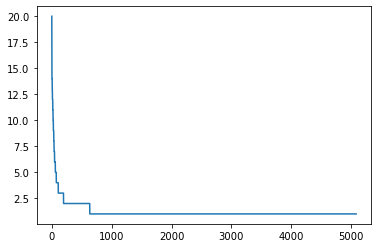

In [15]:
plt.plot(counts)

In [16]:
seqs

(' gi|1848010746|dbj|AP023165.1| Felis catus Senzu DNA  chromosome: E1  American Shorthair breed  ',
 ' gi|1885978887|emb|LR862362.1| Pipistrellus pipistrellus genome assembly  chromosome: 6  ',
 ' gi|1885978892|emb|LR862367.1| Pipistrellus pipistrellus genome assembly  chromosome: 11  ',
 ' gi|1828350105|gb|CP050595.1| Canis lupus familiaris breed Labrador retriever chromosome 05a  ',
 ' gi|1548994291|gb|CP034495.1| Eukaryotic synthetic construct chromosome 17 >gi|1549096955|gb|CP034520.1| Eukaryotic synthetic construct chromosome 17  ',
 ' gi|1548994289|gb|CP034493.1| Eukaryotic synthetic construct chromosome 15 >gi|1549096430|gb|CP034518.1| Eukaryotic synthetic construct chromosome 15  ',
 ' gi|1548994288|gb|CP034492.1| Eukaryotic synthetic construct chromosome 14 >gi|1549096114|gb|CP034517.1| Eukaryotic synthetic construct chromosome 14  ',
 ' gi|1885978889|emb|LR862364.1| Pipistrellus pipistrellus genome assembly  chromosome: 8  ',
 ' gi|1848010747|dbj|AP023166.1| Felis catus Senz

### Non black flying fox sequences

In [18]:
non_flying_fox = [x for x in titles if 'pteropus alecto' not in x.lower()]


In [19]:
seqs_non_flying_fox, counts_non_flying_fox = np.unique(non_flying_fox, return_counts=True)

In [20]:
counts_non_flying_fox, seqs_non_flying_fox = zip(*sorted(zip(counts_non_flying_fox, seqs_non_flying_fox), reverse=True))

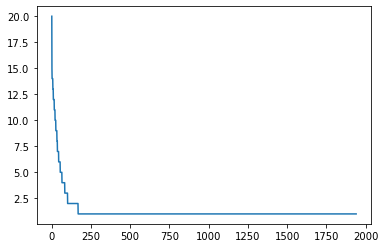

In [21]:
plt.plot(counts_non_flying_fox)

In [22]:
seqs_non_flying_fox

(' gi|1848010746|dbj|AP023165.1| Felis catus Senzu DNA  chromosome: E1  American Shorthair breed  ',
 ' gi|1885978887|emb|LR862362.1| Pipistrellus pipistrellus genome assembly  chromosome: 6  ',
 ' gi|1885978892|emb|LR862367.1| Pipistrellus pipistrellus genome assembly  chromosome: 11  ',
 ' gi|1828350105|gb|CP050595.1| Canis lupus familiaris breed Labrador retriever chromosome 05a  ',
 ' gi|1548994291|gb|CP034495.1| Eukaryotic synthetic construct chromosome 17 >gi|1549096955|gb|CP034520.1| Eukaryotic synthetic construct chromosome 17  ',
 ' gi|1548994289|gb|CP034493.1| Eukaryotic synthetic construct chromosome 15 >gi|1549096430|gb|CP034518.1| Eukaryotic synthetic construct chromosome 15  ',
 ' gi|1548994288|gb|CP034492.1| Eukaryotic synthetic construct chromosome 14 >gi|1549096114|gb|CP034517.1| Eukaryotic synthetic construct chromosome 14  ',
 ' gi|1885978889|emb|LR862364.1| Pipistrellus pipistrellus genome assembly  chromosome: 8  ',
 ' gi|1848010747|dbj|AP023166.1| Felis catus Senz

In [23]:
counts_non_flying_fox

(20,
 15,
 14,
 14,
 14,
 14,
 14,
 13,
 13,
 13,
 12,
 12,
 12,
 12,
 12,
 12,
 11,
 11,
 11,
 11,
 11,
 10,
 10,
 10,
 10,
 10,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 8,
 8,
 8,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1